## Imports

In [67]:
import pandas as pd

In [68]:
df_awards_players = pd.read_csv('data/awards_players_processed.csv')
df_coaches = pd.read_csv('data/coaches_processed.csv')
df_players_teams = pd.read_csv('data/players_teams_processed.csv')
df_players = pd.read_csv('data/players_processed.csv')
df_series_post = pd.read_csv('data/series_post_processed.csv')
df_teams = pd.read_csv('data/teams_processed.csv')
df_teams_post = pd.read_csv('data/teams_post_processed.csv')

## Merge datasets

Agregate the data from series_post by the number of wins of each player and the number of losses, then join it to the Teams dataset 

In [69]:

# Join the team statistics with the second DataFrame
#df_teams = pd.merge(df_teams, df_series_post, on=["year", "tmID"], how="left").fillna(0)

df_teams.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     142 non-null    int64  
 1   tmID                     142 non-null    object 
 2   rank                     142 non-null    float64
 3   playoff                  142 non-null    int64  
 4   homeW                    142 non-null    float64
 5   homeL                    142 non-null    float64
 6   awayW                    142 non-null    float64
 7   awayL                    142 non-null    float64
 8   confW                    142 non-null    float64
 9   confL                    142 non-null    float64
 10  min                      142 non-null    float64
 11  attend                   142 non-null    float64
 12  num_playoff_appearances  142 non-null    float64
 13  total_first_round_won    142 non-null    float64
 14  total_first_round_lost   1

Agregate data from players team, players info and awards and join it to the Teams dataset

In [70]:
players_teams_info_df = pd.merge(df_players_teams, df_players, left_on='playerID', right_on='bioID', how='left')
players_teams_info_df = pd.merge(players_teams_info_df, df_awards_players, on=['playerID', 'year'], how='left').fillna(0)
players_teams_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   playerID              1290 non-null   object 
 1   year                  1290 non-null   int64  
 2   tmID                  1290 non-null   object 
 3   GP                    1290 non-null   float64
 4   GS                    1290 non-null   float64
 5   minutes               1290 non-null   float64
 6   oRebounds             1290 non-null   float64
 7   dRebounds             1290 non-null   float64
 8   dq                    1290 non-null   float64
 9   PostGP                1290 non-null   float64
 10  PostGS                1290 non-null   float64
 11  PostMinutes           1290 non-null   float64
 12  PostoRebounds         1290 non-null   float64
 13  PostdRebounds         1290 non-null   float64
 14  PostDQ                1290 non-null   float64
 15  Postperformance      

For each team and year agregate the statistics of the players in the team and join it to the Teams dataset.

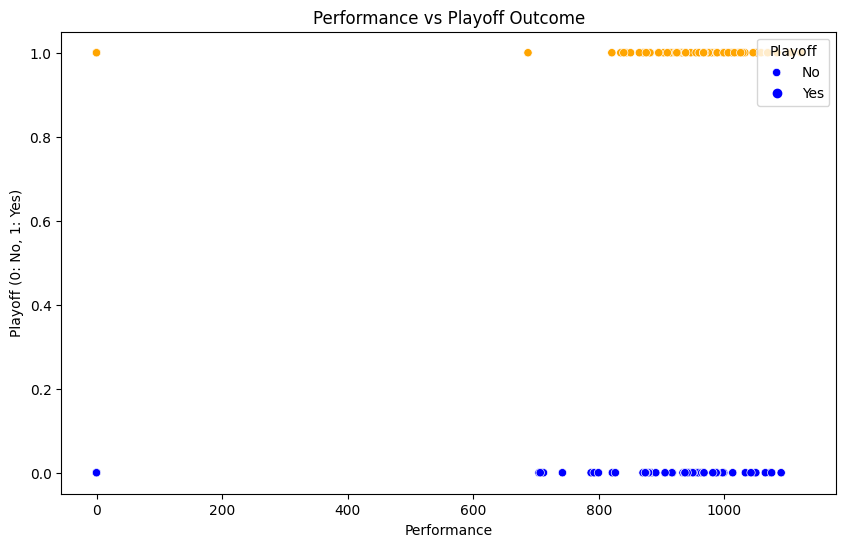

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

top_players_per_team_year = players_teams_info_df.groupby(['tmID', 'year']).apply(lambda group: group.nlargest(3, 'performance')).reset_index(drop=True)
top_players_per_team_year.head()

agg_players_df = top_players_per_team_year.groupby(["year", "tmID"]).agg({
    "GP": "mean",
    "GS": "mean",
    "minutes": "mean",
    "oRebounds": "mean",
    "dRebounds": "mean",
    "dq": "mean",
    "PostGP": "mean",
    "PostGS": "mean",
    "PostMinutes": "mean",
    "PostoRebounds": "mean",
    "PostdRebounds": "mean",
    "performance": "mean",
    "Postperformance": "mean",
    'points_precision': 'mean',
    'Postpoints_precision': 'mean',
    "PostDQ": "mean",
    "height": "mean",
    "weight": "mean",
    "award_count": "mean",

    # Add more columns you want to aggregate here
}).reset_index()

# agg_players_df = players_teams_info_df.groupby(["year", "tmID"]).agg({
#     "GP": "mean",
#     "GS": "mean",
#     "minutes": "mean",
#     "points": "mean",
#     "oRebounds": "mean",
#     "dRebounds": "mean",
#     "rebounds": "mean",
#     "assists": "mean",
#     "steals": "mean",
#     "blocks": "mean",
#     "turnovers": "mean",
#     "PF": "mean",
#     "fgAttempted": "mean",
#     "fgMade": "mean",
#     "ftAttempted": "mean",
#     "ftMade": "mean",
#     "threeAttempted": "mean",
#     "threeMade": "mean",
#     "dq": "mean",
#     "PostGP": "mean",
#     "PostGS": "mean",
#     "PostMinutes": "mean",
#     "PostPoints": "mean",
#     "PostoRebounds": "mean",
#     "PostdRebounds": "mean",
#     "PostRebounds": "mean",
#     "PostAssists": "mean",
#     "PostSteals": "mean",
#     "PostBlocks": "mean",
#     "PostTurnovers": "mean",
#     "PostPF": "mean",
#     "PostfgAttempted": "mean",
#     "PostfgMade": "mean",
#     "PostftAttempted": "mean",
#     "PostftMade": "mean",
#     "PostthreeAttempted": "mean",
#     "PostthreeMade": "mean",
#     "PostDQ": "mean",
#     "height": "mean",
#     "weight": "mean",
#     "award_count": "mean",

#     # Add more columns you want to aggregate here
# }).reset_index()

df_teams = pd.merge(df_teams, agg_players_df, on=['year', 'tmID'], how='left').fillna(0)
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minutes', y='playoff', data=df_teams, hue='playoff', palette={0: 'blue', 1: 'orange'})
plt.title('Performance vs Playoff Outcome')
plt.xlabel('Performance')
plt.ylabel('Playoff (0: No, 1: Yes)')
plt.legend(title='Playoff', loc='upper right', labels=['No', 'Yes'])
plt.show()

    

In [72]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     142 non-null    int64  
 1   tmID                     142 non-null    object 
 2   rank                     142 non-null    float64
 3   playoff                  142 non-null    int64  
 4   homeW                    142 non-null    float64
 5   homeL                    142 non-null    float64
 6   awayW                    142 non-null    float64
 7   awayL                    142 non-null    float64
 8   confW                    142 non-null    float64
 9   confL                    142 non-null    float64
 10  min                      142 non-null    float64
 11  attend                   142 non-null    float64
 12  num_playoff_appearances  142 non-null    float64
 13  total_first_round_won    142 non-null    float64
 14  total_first_round_lost   1

Merge team information with coach information

In [73]:
df_coaches_with_awards = pd.merge(df_coaches, df_awards_players, left_on=['coachID', 'year'], right_on=['playerID', 'year'], how='left').fillna(0)
df_coaches_with_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   coachID      162 non-null    object 
 1   year         162 non-null    int64  
 2   tmID         162 non-null    object 
 3   stint        162 non-null    int64  
 4   won          162 non-null    float64
 5   lost         162 non-null    float64
 6   post_wins    162 non-null    float64
 7   post_losses  162 non-null    float64
 8   playerID     162 non-null    object 
 9   award_count  162 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 12.8+ KB


In [74]:
agg_coaches_df = df_coaches_with_awards.groupby(["year", "tmID"]).agg({
    "won": "mean",
    "lost": "mean",
    "post_wins": "mean",
    "post_losses": "mean",
    "award_count": "mean",
}).reset_index()

df_teams = pd.merge(df_teams, agg_coaches_df, on=['year', 'tmID'], how='left')
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     142 non-null    int64  
 1   tmID                     142 non-null    object 
 2   rank                     142 non-null    float64
 3   playoff                  142 non-null    int64  
 4   homeW                    142 non-null    float64
 5   homeL                    142 non-null    float64
 6   awayW                    142 non-null    float64
 7   awayL                    142 non-null    float64
 8   confW                    142 non-null    float64
 9   confL                    142 non-null    float64
 10  min                      142 non-null    float64
 11  attend                   142 non-null    float64
 12  num_playoff_appearances  142 non-null    float64
 13  total_first_round_won    142 non-null    float64
 14  total_first_round_lost   1

Merges the teams with teams post and added the value 0 to the teams that did not have any wins or losses

In [75]:
#df_teams = pd.merge(df_teams, df_teams_post, on=['year', 'tmID'], how='left').fillna(0)
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     142 non-null    int64  
 1   tmID                     142 non-null    object 
 2   rank                     142 non-null    float64
 3   playoff                  142 non-null    int64  
 4   homeW                    142 non-null    float64
 5   homeL                    142 non-null    float64
 6   awayW                    142 non-null    float64
 7   awayL                    142 non-null    float64
 8   confW                    142 non-null    float64
 9   confL                    142 non-null    float64
 10  min                      142 non-null    float64
 11  attend                   142 non-null    float64
 12  num_playoff_appearances  142 non-null    float64
 13  total_first_round_won    142 non-null    float64
 14  total_first_round_lost   1

In [76]:
df_teams.to_csv('data_merged.csv', index=False)